<a href="https://colab.research.google.com/github/Jdvilan/suprema-octo-panqueque/blob/circleci-project-setup/Dirichlet_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para la solución de la ecuación:
$$\frac{∂^2\mathcal{U}}{∂x^2}+\frac{∂^2\mathcal{U}}{∂y^2}=0,\hspace{1cm}0<x<1,\hspace{1cm}0<y<1$$
Sujeta a las condiciones de frontera:
$$\mathcal{U}(0,y)=\mathcal{U}(1,y)=0$$
$$\mathcal{U}(x,0)=100,\hspace{1cm}\mathcal{U}(x,1)=200$$
Paso 1:

Suponemos una solución de la forma $\mathcal{U}(x, y) = X(x)Y(y)$. Derivamos y al sustituir en la ecuación obtenemos la igualdad:
$$X''(x)Y(y)+Y''(y)X(x)=0$$
Como ni $X(x)$ ni $Y(y)$ son 0, porque de serlo, también $\mathcal{U}$ lo sería, podemos dividir la última ecuación por $X(x)Y(y)$ para obtener:
$$\frac{X''(x)}{X(x)}=-\frac{Y''(y)}{Y(y)}$$
La única forma de que se cumpla la igualdad es que ambos sean iguales a la misma constante. Por conveniencia igualamos a $-\lambda$ y separamos las ecuaciones:
$$X''(x)+\lambda X(x)=0\hspace{1cm}...(1)$$
$$Y''(y)-\lambda Y(y)=0\hspace{1cm}...(2)$$
Para completar la separación, acotamos las condiciones de frontera. Notemos que $\mathcal{U}(0,y)=X(0)Y(y)=0$ para todo $0<y<b$. Como $Y\neq 0$, se sigue que $X(0)=0$. Analogamente, $\mathcal{U}(1,y)=0$ lleva a la condición $X(1)=0$.

Paso 2:

La ecuación (1) separada es un problema S-L. Sabemos que sus valores propios y sus funciones propias tienen la forma:
$$\lambda_n=(n\pi)^2,\hspace{1cm}X_n(x)=\sin{(n\pi x)},\hspace{1cm}n=1, 2, 3, ...$$
Sustituimos $\lambda_n$, en la ecuación (2):
$$Y''(y)-(nπ)^2Y(y)=0$$
Que tiene por solución:
$$Y_n(y)=C_1\cosh{(nπy)}+C_2\sinh{(nπy)}$$
Paso 3:

Combinamos las soluciones para tener
$$\mathcal{U}(x,y)=X_n(x)Y_n(y)=\sin{(n\pi x)}(C_1\cosh{(nπy)}+C_2\sinh{(nπy)}),\hspace{1cm}n=1, 2, 3, ...$$
Finalmente la solución esta dada en términos de la serie de Fourier por la expresión:
$$\mathcal{U}(x, y)=\sum_{n=1}^{\infty} \sin{(n\pi x)}(a_n\cosh{(nπy)}+b_n\sinh{(nπy)})$$
Donde:
$$a_n=\frac{200(1-(-1)^n)}{nπ}$$
$$b_n=\frac{a_n(2-\cosh(nπ))}{\sinh(nπ)}$$
Este problema modela la temperatura en una placa rectangular.

In [ ]:
from pylab import *
from matplotlib import animation,rc 
from IPython.display import HTML 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [ ]:
def u_x_y(x,y,N=50):
    f = zeros( (len(x),len(y)) )
    for i in range(len(y)):
        for n in range(1,N):
            a = 200*(1-(-1)**n)/(n*pi)
            b = a*(2-cosh(n*pi))/sinh(n*pi)
            f[:,i] += sin(n*pi*x)*(a*cosh(n*pi*y[i])+b*sinh(n*pi*y[i]))
    return f

Podemos ver esto en una gráfica en 3D.



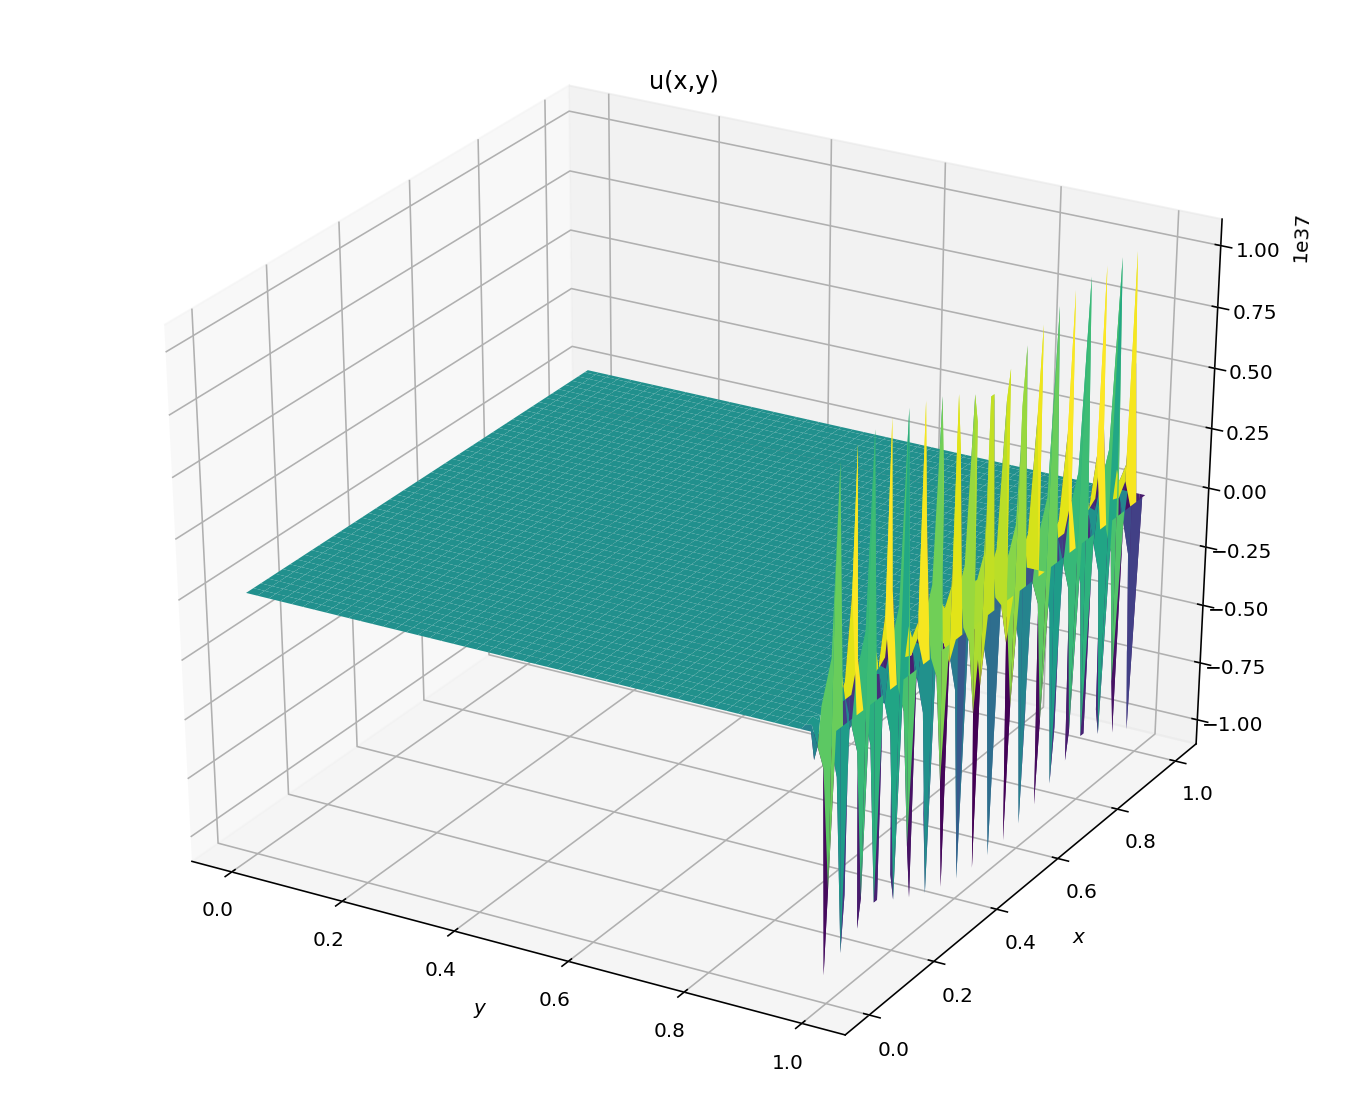

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
y = linspace(0,1.0,100)

X,Y = np.meshgrid(x,y)

U = u_x_y(x,y)

plt.xlabel('$y$'); plt.ylabel('$x$'); 
plt.title("u(x,y)")
ax.plot_surface(X, Y, U, cmap="viridis");